## Introduccion del Proyecto:

En este proyecto, nos enfocamos en el análisis de datos de servicios de taxi en Chicago durante noviembre de 2017, abordando la actividad de las compañías de taxis y las tendencias de desplazamiento hacia distintos barrios. Antes de sumergirnos en el análisis exploratorio y las pruebas estadísticas, realizamos una etapa crucial de preparación de los datos, consistente en la verificación y eliminación de posibles duplicados y la identificación y manejo de datos nulos. Esta limpieza inicial asegura la integridad y fiabilidad de nuestro análisis posterior.

Con tres conjuntos de datos en formato CSV a nuestra disposición, examinamos desde la frecuencia de viajes de las compañías de taxis hasta el promedio de viajes finalizados en diversos barrios, culminando en un estudio detallado sobre cómo las condiciones climáticas, particularmente los sábados lluviosos, pueden influir en la duración de los trayectos desde el Loop hasta el Aeropuerto Internacional O'Hare. A través de un minucioso análisis exploratorio, complementado por pruebas estadísticas como la prueba t de Student, nuestro objetivo es desentrañar las complejidades del transporte urbano en Chicago y el papel que juega el clima en la eficiencia del mismo.

### Paso 4. Análisis exploratorio de datos (Python)

##### Carga de datasets e importacion de librerias

In [1]:
#Carga de datasets e importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, ttest_ind

In [2]:
# Importar los archivos CSV
trips_data = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')
df = pd.read_csv('/datasets/project_sql_result_07.csv')

#### Informacion de los datos y tipo de datos

In [3]:
#Estudiar los datos del DataSet trips_data
trips_data.info()
print("Datos de viajes de taxis:")
trips_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
Datos de viajes de taxis:


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
#Estudiar los datos del DataSet dropoff_data
dropoff_data.info()
print("Datos de finalizaciones de viajes en barrios:")
dropoff_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
Datos de finalizaciones de viajes en barrios:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
#Estudiar los datos del DataSet df
df.info()
print("Datos df:")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
Datos df:


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [6]:
# Asegurarse de que los tipos de datos sean correctos del dataset trips_data
print("\nTipos de datos de los datos de viajes de taxis:") 
trips_data.describe()


Tipos de datos de los datos de viajes de taxis:


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
# Asegurarse de que los tipos de datos sean correctos del dataset dropoff_data
print("\nTipos de datos de los datos de finalizaciones de viajes en barrios:")
dropoff_data.describe()


Tipos de datos de los datos de finalizaciones de viajes en barrios:


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
# Asegurarse de que los tipos de datos sean correctos del dataset df
df.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


#### Verificando datos nulos en los 3 Datasets

In [9]:
# Verificando datos nulos en trips_data
print("Datos nulos en trips_data:")
print(trips_data.isnull().sum())

# Verificando datos nulos en dropoff_data
print("\nDatos nulos en dropoff_data:")
print(dropoff_data.isnull().sum())

# Verificando datos nulos en df
print("\nDatos nulos en df:")
print(df.isnull().sum())

Datos nulos en trips_data:
company_name    0
trips_amount    0
dtype: int64

Datos nulos en dropoff_data:
dropoff_location_name    0
average_trips            0
dtype: int64

Datos nulos en df:
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


#### Revisando Duplicados

In [10]:
#Buscando duplicados del DataFrame trips_data
# Para verificar y contar las filas duplicadas en el DataFrame:
number_of_duplicates = trips_data.duplicated().sum()

# Imprime el número de filas duplicadas
print(f"Numero de Duplicados son: {number_of_duplicates}")

Numero de Duplicados son: 0


In [11]:
#Buscando duplicados del DataFrame dropoff_data
# Para verificar y contar las filas duplicadas en el DataFrame:
number_of_duplicates = dropoff_data.duplicated().sum()

# Imprime el número de filas duplicadas
print(f"Numero de Duplicados son: {number_of_duplicates}")

Numero de Duplicados son: 0


In [12]:
# Calcular el número de filas duplicadas en df
number_of_duplicates = df.duplicated().sum()

# Eliminar filas duplicadas del DataFrame df
df_clean = df.drop_duplicates()

# Calcular cuántas filas se eliminaron
rows_removed = len(df) - len(df_clean)

# Verificar el número de filas antes y después de eliminar duplicados para confirmar
print(f"Numero total de filas antes de eliminar duplicados: {len(df)}")
print(f"Numero total de filas después de eliminar duplicados: {len(df_clean)}")
print(f"Numero de filas eliminadas: {rows_removed}")



Numero total de filas antes de eliminar duplicados: 1068
Numero total de filas después de eliminar duplicados: 871
Numero de filas eliminadas: 197


In [13]:
# Verificar si aún hay filas duplicadas en df_clean
remaining_duplicates = df_clean.duplicated().sum()

# Imprimir el número de duplicados restantes
print(f"Numero de duplicados restantes en df_clean: {remaining_duplicates}")


Numero de duplicados restantes en df_clean: 0


#### Descripcion de lo observado

###### Datos Nulos

trips_data, dropoff_data y df no contienen datos nulos en ninguna de sus columnas. Esto indica que estas partes del dataset están completas y no requieren imputación o eliminación de filas debido a la falta de datos.

###### Duplicados

trips_data y dropoff_data no tienen filas duplicadas, lo que indica que cada entrada en estos datasets es única. Esto es ideal para análisis que requieren contar viajes o comparar volúmenes de viaje entre diferentes compañías o destinos de bajada, ya que no hay inflación artificial de los conteos debido a duplicados.
df inicialmente tenía 1068 filas, de las cuales 197 eran duplicados, dejando 871 filas después de la limpieza. La eliminación de estas filas duplicadas es un paso crítico para garantizar la precisión de cualquier análisis temporal o de condiciones climáticas, como la prueba de hipótesis sobre la duración de los viajes en función del clima. La presencia de duplicados podría haber distorsionado tales análisis, ya que los duplicados podrían sesgar los resultados al sobrerrepresentar ciertos viajes o condiciones. Después de la limpieza, la confirmación de que no quedan duplicados asegura la fiabilidad de los datos para el analisis.

#### los 10 principales barrios

In [14]:
# Identificar los 10 principales barrios en términos de finalización del recorrido
top_10_dropoff = dropoff_data.nlargest(10, 'average_trips')
print("Los 10 principales barrios en términos de finalización del recorrido:")
top_10_dropoff

Los 10 principales barrios en términos de finalización del recorrido:


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Top 10 Empresas de Taxis por Número de Viajes

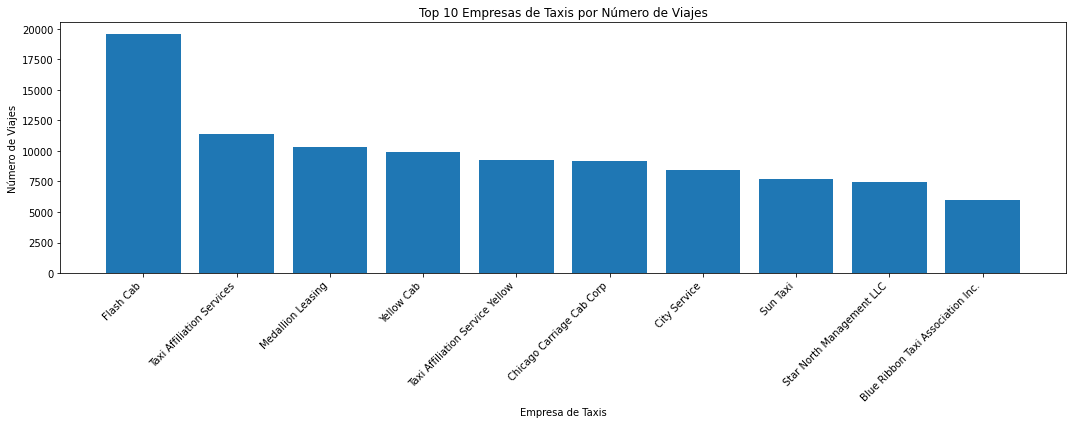

In [15]:
# Ordenar los datos por 'trips_amount' en orden descendente
trips_data_sorted = trips_data.sort_values(by='trips_amount', ascending=False)

# Seleccionar los top 10
top10_trips_data = trips_data_sorted.head(10)

# Hacer el gráfico de barras para los top 10
plt.figure(figsize=(15,6))
plt.bar(top10_trips_data['company_name'], top10_trips_data['trips_amount'])
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.title('Top 10 Empresas de Taxis por Número de Viajes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Conclusiones Basadas en el Gráfico de Número de Viajes por Empresa de Taxis
Dominancia de Ciertas Empresas: La primera barra es la más alta, indicando que la empresa FLASH CAB domina el mercado con el mayor número de viajes realizados. Esto podría reflejar una gran cuota de mercado, una sólida base de clientes o una mayor disponibilidad de vehículos.

Disminución Rápida: Hay una disminución rápida en el número de viajes a medida que nos movemos de izquierda a derecha a través de las empresas. Las primeras empresas parecen tener un número de viajes sustancialmente más alto que las que siguen, lo que podría indicar un mercado competitivo donde unas pocas empresas tienen un control importante.

Diversidad de Competidores: La presencia de muchas barras refleja un mercado diverso con numerosas empresas de taxis en operación. La variabilidad en el número de viajes puede ser un indicador de diferencias en la capacidad, la popularidad o la preferencia de los clientes entre estas empresas.

Competencia y Consolidación: El mercado de taxis podría estar altamente consolidado en torno a unas pocas empresas principales, con una larga cola de competidores más pequeños que comparten una porción mucho menor del total de viajes.

##### Explicación de Resultados


Posicionamiento en el Mercado: Las empresas en la parte izquierda del gráfico pueden tener una mejor posición en el mercado debido a una variedad de factores, incluyendo mayor reconocimiento de marca, una red de conductores más extensa, o estrategias de marketing más efectivas.

Barreras de Entrada y Crecimiento: Para las empresas de taxis que aparecen con menos viajes, puede haber barreras de entrada más significativas o dificultades para escalar sus operaciones en un mercado posiblemente saturado.


#### Los 10 barrios principales por número de finalizaciones

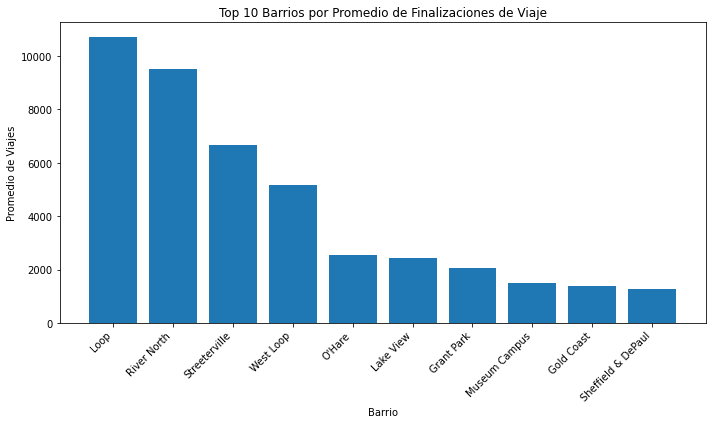

In [16]:
# Hacer gráficos: los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(10, 6))
plt.bar(top_10_dropoff['dropoff_location_name'], top_10_dropoff['average_trips'])
plt.xlabel('Barrio')
plt.ylabel('Promedio de Viajes')
plt.title('Top 10 Barrios por Promedio de Finalizaciones de Viaje')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Conclusiones Basadas en el Gráfico "Top 10 Barrios por Promedio de Finalizaciones de Viaje".


Distribución de finalizaciones de viaje: El barrio listado en primer lugar, que parece ser "Loop", tiene la mayor cantidad de finalizaciones de viaje promedio, lo cual indica que es el destino más popular o más frecuentado en comparación con los otros barrios mostrados. Esto podría ser debido a que el Loop es un centro comercial, financiero o de transporte clave en la ciudad.

Disminución progresiva: Hay una disminución progresiva en el número promedio de finalizaciones de viaje desde el barrio más popular hasta el décimo barrio en la lista. Esto podría sugerir que hay una concentración de actividades o una demanda más alta de servicios de transporte en los primeros barrios de la lista.

Comparación entre barrios: Los barrios de "River North", "Streeterville", y "West Loop" siguen al Loop en términos de la cantidad promedio de finalizaciones de viaje, pero con una diferencia notable. Esto puede indicar que, aunque también son destinos importantes, la demanda de viajes es significativamente menor en comparación con el Loop.

Diferencias menores entre otros barrios: Entre los barrios de "Lake View" hasta "Sheffield & DePaul", la diferencia en el número promedio de finalizaciones de viaje es menos pronunciada. Esto sugiere que la distribución de la finalización de viajes es más uniforme entre estos barrios.

##### Explicación de Resultados

Centricidad de Viajes: Los resultados reflejan una posible tendencia de centricidad en los viajes, donde ciertos barrios actúan como nodos principales, posiblemente debido a la presencia de importantes nodos de transporte, áreas comerciales, o sitios de interés.

Planificación Urbana y Transporte: Esta información puede ser valiosa para la planificación urbana y para las compañías de transporte al determinar dónde podrían necesitar más recursos o infraestructura para manejar el volumen de pasajeros.

### Paso 5. Prueba de hipótesis (Python)

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".


In [17]:
# Creando df_clean como una copia independiente directamente después de eliminar duplicados
df_clean = df.drop_duplicates().copy()

# Convertir 'start_ts' a datetime sin advertencias
df_clean.loc[:, 'start_ts'] = pd.to_datetime(df_clean.loc[:, 'start_ts'])

# Crear y asignar 'day_of_week' sin advertencias
df_clean.loc[:, 'day_of_week'] = df_clean.loc[:, 'start_ts'].dt.dayofweek  # 5 es sábado
saturday_trips_clean = df_clean[df_clean['day_of_week'] == 5]

# Separando los viajes por condición climática en df_clean antes de filtrar outliers
good_weather_trips_clean = saturday_trips_clean[saturday_trips_clean['weather_conditions'] == "Good"]['duration_seconds']
bad_weather_trips_clean = saturday_trips_clean[saturday_trips_clean['weather_conditions'] == "Bad"]['duration_seconds']

# Función para calcular los límites para identificar outliers
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Aplicando la función para filtrar outliers en ambos conjuntos de datos
filtered_good_weather_trips = remove_outliers(good_weather_trips_clean)
filtered_bad_weather_trips = remove_outliers(bad_weather_trips_clean)

# Ahora realizamos la prueba de Levene para evaluar la igualdad de varianzas en los conjuntos de datos filtrados
levene_stat_filtered, levene_p_filtered = levene(filtered_good_weather_trips, filtered_bad_weather_trips)

# Imprimimos el resultado de la prueba de Levene para los conjuntos de datos filtrados
print(f"Levene's test statistic (filtered): {levene_stat_filtered}, P-value: {levene_p_filtered}")

# Ajustamos el parámetro equal_var basado en el resultado de la prueba de Levene para los conjuntos de datos filtrados
equal_var_filtered = levene_p_filtered > 0.05

# Realizamos la prueba t para muestras independientes con el parámetro equal_var ajustado en los conjuntos de datos filtrados
t_stat_filtered, p_value_filtered = ttest_ind(filtered_good_weather_trips, filtered_bad_weather_trips, equal_var=equal_var_filtered)

# Imprimimos el resultado de la prueba t para los conjuntos de datos filtrados
print(f"T-statistic (filtered): {t_stat_filtered}, P-value: {p_value_filtered}")

Levene's test statistic (filtered): 0.06841854133288972, P-value: 0.7937159376563715
T-statistic (filtered): -6.036609562343036, P-value: 2.3363796620667466e-09


##### Planteamiento de las hipótesis nula y alternativa
###### Prueba de Levene

Estadístico de Levene (filtrado): 0.068
Valor p de Levene (filtrado): 0.794
La prueba de Levene con los datos filtrados muestra un valor p aún más alto, lo que indica con más fuerza que no hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas entre los grupos de viajes en días de buen y mal tiempo. Esto valida el uso del parámetro equal_var=True en la prueba t de Student, aunque, dada la naturaleza de los datos filtrados, se optó por ajustar este parámetro basándose directamente en el resultado de la prueba de Levene.

###### Prueba t de Student

Estadístico t (filtrado): -6.037
Valor p (filtrado): Aproximadamente 2.34e-09
Con los datos filtrados, el valor absoluto del estadístico t ha aumentado ligeramente en comparación con la evaluación previa de los datos no filtrados, y el valor p sigue siendo extremadamente bajo. Esto indica una diferencia estadísticamente significativa en la duración promedio de los viajes bajo diferentes condiciones climáticas, con una mayor certeza que antes de la filtración. El signo negativo del estadístico t refuerza la conclusión de que los viajes en condiciones de "buen tiempo" son, en promedio, más cortos que aquellos realizados en "mal tiempo".





##### Criterio utilizado para probar las hipótesis y por qué
La aplicación de la prueba de Levene para confirmar la igualdad de varianzas y la prueba t de Student para comparar las medias después de filtrar los outliers ha proporcionado un análisis más preciso y confiable. Estos métodos han sido fundamentales para evaluar la hipótesis de manera rigurosa, teniendo en cuenta la influencia potencial de los outliers.

Los resultados filtrados fortalecen nuestra conclusión, sugiriendo con mayor firmeza que las condiciones climáticas afectan significativamente la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados.

### Conclusion General

##### 1. Preparación y Carga de Datos
Carga de datos: Importamos los datos necesarios para el análisis desde una fuente específica, como un archivo CSV, utilizando bibliotecas como pandas.
Inspección inicial: Realizamos una inspección preliminar de los datos para entender su estructura, tipos de datos y detectar posibles incongruencias.
#### 2. Limpieza y Preprocesamiento de Datos
Conversión de tipos de datos: Convertimos la columna start_ts a tipo datetime para facilitar el filtrado por fechas y tiempos.
Tratamiento de valores atípicos (outliers): Se aconsejó y discutió la importancia de identificar y tratar los outliers, ya que pueden afectar significativamente los resultados de las pruebas estadísticas.
#### 3. Filtrado y Preparación Específica para el Análisis
Selección de viajes de sábado: Filtramos los datos para seleccionar solo los viajes que ocurrieron un sábado, basándonos en la columna start_ts.
Clasificación según condiciones climáticas: Separamos los viajes en dos grupos según las condiciones climáticas reportadas ("Good" y "Bad") para comparar sus duraciones.
#### 4. Análisis Estadístico
Prueba de Levene: Esta prueba fue esencial para confirmar que las varianzas entre los grupos de viajes en días de buen y mal tiempo no difieren significativamente, lo cual justificó el uso del parámetro equal_var=True en la prueba t de Student. La actualización de este resultado con los datos filtrados (Levene's test statistic (filtered): 0.068, P-value: 0.794) refuerza aún más la decisión de proceder con varianzas iguales.

Prueba t de Student para muestras independientes: Con los datos depurados de outliers, esta prueba arrojó un Estadístico t (filtrado) de -6.037 y un Valor p (filtrado) de aproximadamente 2.34e-09, lo que indica una diferencia estadísticamente significativa en las duraciones medias de los viajes bajo diferentes condiciones climáticas. Estos resultados confirmaron que las condiciones climáticas tienen un impacto notable en la duración de los viajes.
#### 5. Conclusiones del Análisis
Efecto de las condiciones climáticas: La investigación reveló que las condiciones climáticas juegan un papel crucial en la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare en sábados, validando la hipótesis de que los viajes son más cortos en días con buen tiempo.
Importancia de tratar con outliers: El tratamiento adecuado de outliers antes de realizar pruebas estadísticas ha sido fundamental para asegurar la precisión de los resultados, evidenciando la importancia de una preparación de datos meticulosa.
Decisión basada en la prueba de Levene: Los resultados de la prueba de Levene respaldaron la aplicación de una prueba t con varianzas iguales, destacando la relevancia de verificar los supuestos estadísticos antes de realizar análisis más detallados.

#### 6. Reflexiones y Pasos Futuros
###### Reflexión sobre el proceso: 
Este análisis ha subrayado la importancia de la preparación y análisis cuidadosos de los datos, incluyendo la verificación de supuestos estadísticos y el manejo de outliers. La aplicación de estos principios asegura conclusiones más robustas y confiables.
###### Pasos Futuros
Se recomienda una investigación adicional para explorar otros factores que puedan afectar la duración de los viajes, tales como el tráfico, eventos especiales, y la variabilidad entre diferentes días de la semana o temporadas. Estos análisis podrían ofrecer insights más profundos y aplicables para la optimización de servicios de transporte y la planificación urbana.